### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split

### Import Model Class

In [2]:
from src.neural_network import Artificial_Neural_Network

### Define Function to Split Dataset

In [3]:
def train_test_grouped(data:pd.core.frame.DataFrame,
                       target_group:str, 
                       test_size:float, 
                       rs=42): #### -> (pd.core.frame.DataFrame, pd.core.frame.DataFrame):
    
    groups = data.groupby(target_group) #Split Dataset by the values of the target column

    ##Random Split
    train_sets = []
    test_sets = []
    for _, group in groups:
        train, test = train_test_split(group, test_size=test_size, random_state=rs)
        train_sets.append(train)
        test_sets.append(test)

    ##Concatenate the test and training sets
    train_df = pd.concat(train_sets)
    test_df = pd.concat(test_sets)


    return train_df, test_df

### Load Data

In [4]:
####iris = load_iris()
####target = 'species'
####data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
####data[target] = iris['target']
####data = data[data[target] != 2]
####names = iris.target_names[0:-1]
####print(names)

In [5]:
wine = load_wine()
target = 'color'
data = pd.DataFrame(wine['data'], columns=wine['feature_names'])
data[target] = wine['target']
target_names = wine.target_names
print(target_names)

['class_0' 'class_1' 'class_2']


Split Dataset

In [6]:
train_df, test_df = train_test_grouped(data, target, 0.15)

In [7]:
scaler = MinMaxScaler() #Define Data Scaler

        Training

In [8]:
train_features = train_df.drop(target, axis=1)
train_labels = train_df[target]

In [9]:
train_features = np.array(train_features)
train_labels = np.array(train_labels)
train_labels = train_labels.reshape(train_labels.shape[0], 1)

In [10]:
train_features = scaler.fit_transform(train_features)
train_labels = scaler.fit_transform(train_labels)

        Validation

In [11]:
test_features = test_df.drop(target, axis=1)
test_labels = test_df[target]

In [12]:
test_features = np.array(test_features)
test_labels = np.array(test_labels)
test_labels = test_labels.reshape(test_labels.shape[0], 1)

In [13]:
test_features = scaler.fit_transform(test_features)
test_labels = scaler.fit_transform(test_labels)

                        Verify that the dataset is correctly split

In [14]:
if train_features.shape[1] != test_features.shape[1]:
    raise Warning("The training and validation datasets doesn't have the same number of features")

if train_labels.shape[1] != test_labels.shape[1]:
    raise Warning("The training and validation datasets doesn't have the same number of labels")

### Define the ANN

In [15]:
inp = train_features.shape[1]
hidden = 4
out = train_labels.shape[1]

NN = Artificial_Neural_Network(input_size=inp, hidden_size=hidden, output_size=out)

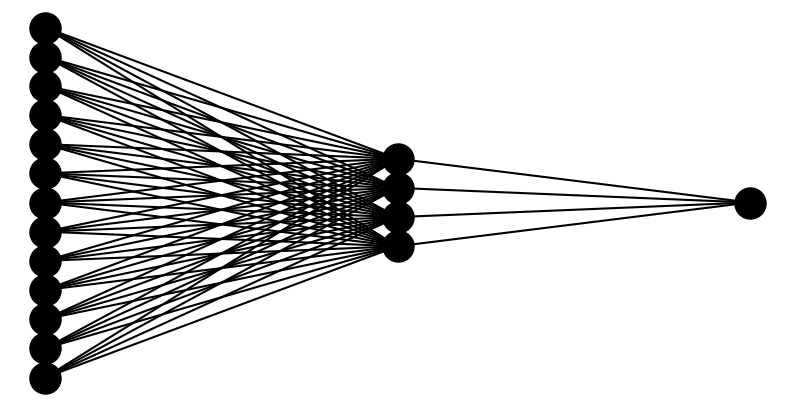

In [16]:
NN.graph_neural_network()

Fit the ANN

MSE = 0.24920826438754912


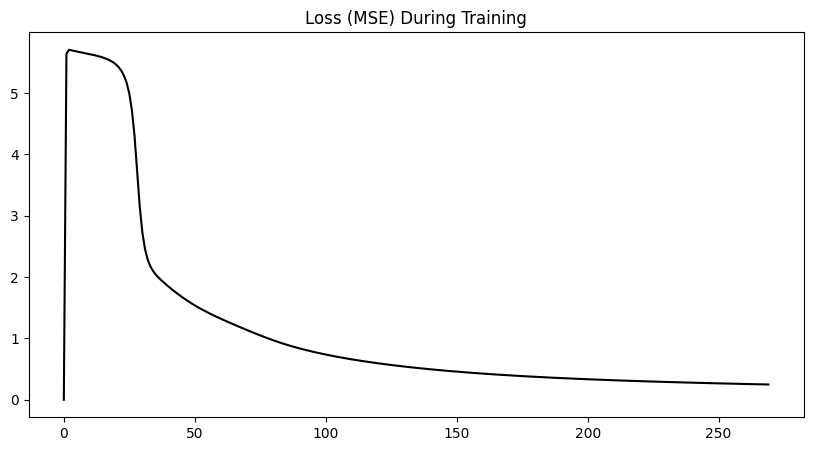

In [17]:
Y_T, w, c = NN.fit(train_features, train_labels, alpha=0.6, iterations=1000, MSE_stop=0.25)

In [18]:
train_score = NN.accuracy(train_labels, Y_T, scaler=scaler)
print("Training Accuracy = " + str(round(train_score*100,2)) + "%")

Training Accuracy = 99.33%


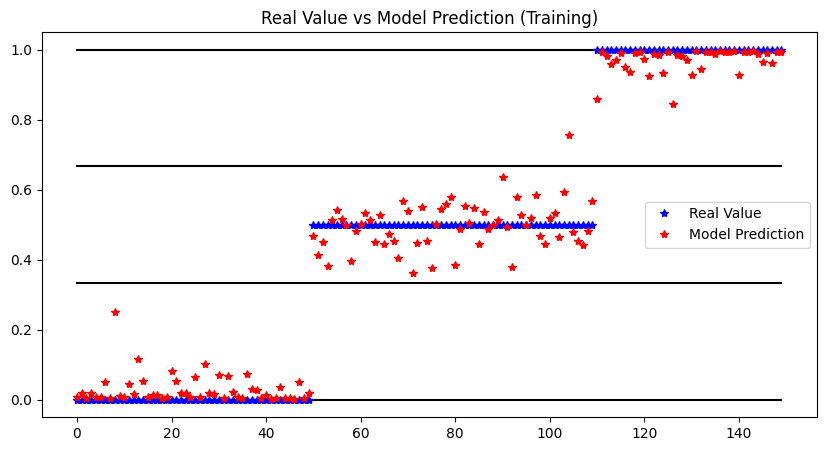

In [19]:
NN.graph_results(train_labels, Y_T, title="Real Value vs Model Prediction (Training)")

Validation of the Model

In [20]:
####filas, columnas = test_features.shape
####indice_aleatorio = np.random.permutation(filas)

####arr_F = test_features[indice_aleatorio, :]
####arr_L = test_labels[indice_aleatorio, :]

In [21]:
Y_V = NN.predict(test_features, w=w, c=c)

In [22]:
test_score = NN.accuracy(test_labels, Y_V, scaler=scaler)
print("Validation Accuracy = " + str(round(test_score*100,2)) + "%")

Validation Accuracy = 96.43%


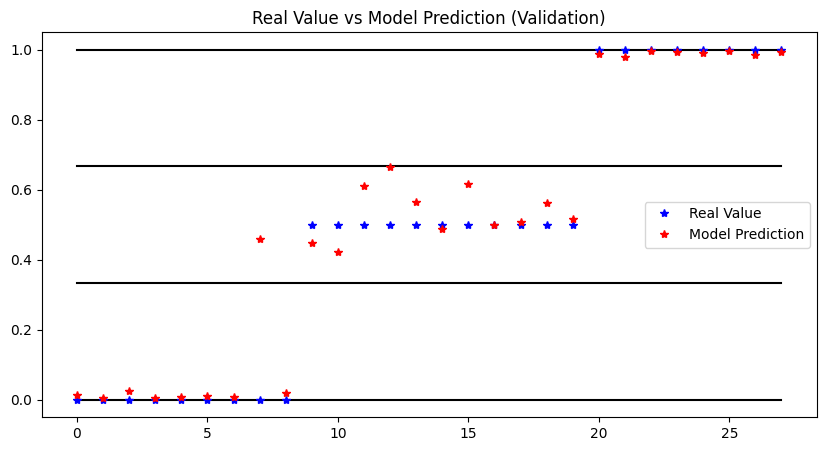

In [23]:
NN.graph_results(test_labels, Y_V, title="Real Value vs Model Prediction (Validation)")

In [24]:
table = NN.probas(test_labels, Y_V, names=target_names)
table

,Model Classification,Probability,Real Classification
0,class_0,0.985068,class_0
1,class_0,0.995999,class_0
2,class_0,0.976007,class_0
3,class_0,0.993537,class_0
4,class_0,0.992214,class_0
5,class_0,0.989825,class_0
6,class_0,0.990986,class_0
7,class_1,0.958898,class_0
8,class_0,0.981485,class_0
9,class_1,0.949194,class_1
